# North Atlantic Trends

A response for data request. Create a timeseries of SST values for North Atlantic Region. Applicable for any ad-hoc area coverage request that has min/max lat and lon values.

In [1]:
# Libraries
from bs4 import BeautifulSoup
import requests
import os
import dask
import xarray as xr
import datetime
import oisstools as ot


#### 1. Set workspace
workspace = "local"
box_root = ot.set_workspace("local")

# Check that the root directory isn't broken
os. listdir('/Users/akemberling/Library/CloudStorage/') 


['.DS_Store', 'Box-Box']

In [2]:
# Load the data
sst_grid = ot.load_box_oisst(box_root= box_root, start_yr = 1982, end_yr= 2023, anomalies = False, do_parallel = True)
sst_grid


<xarray.Dataset>
Dimensions:  (time: 15234, lat: 720, lon: 1440)
Coordinates:
  * time     (time) datetime64[ns] 1982-01-01 1982-01-02 ... 2023-09-16T12:00:00
  * lat      (lat) float32 -89.88 -89.62 -89.38 -89.12 ... 89.38 89.62 89.88
  * lon      (lon) float32 0.125 0.375 0.625 0.875 ... 359.1 359.4 359.6 359.9
Data variables:
    sst      (time, lat, lon) float32 dask.array<chunksize=(365, 720, 1440), meta=np.ndarray>
Attributes:
    Conventions:    CF-1.5
    title:          NOAA High-resolution Blended Analysis: Daily Values using...
    institution:    NOAA/NCDC
    source:         NOAA/NCDC  ftp://eclipse.ncdc.noaa.gov/pub/OI-daily-v2/
    comment:        Reynolds, et al., 2007: Daily High-Resolution-Blended Ana...
    history:        Thu Aug 24 13:35:47 2017: ncatted -O -a References,global...
    references:     https://www.esrl.noaa.gov/psd/data/gridded/data.noaa.oiss...
    dataset_title:  NOAA Daily Optimum Interpolation Sea Surface Temperature

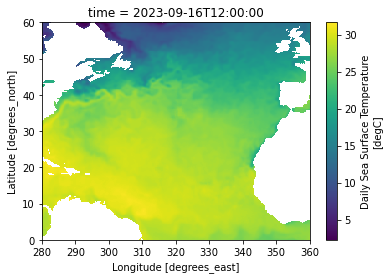

In [3]:
# Subset to the proper area
atl_grid = sst_grid.sel(lon = slice(280, 360), lat = slice(0,60))

# Plot a check
atl_grid.sst.isel(time = -1).plot()

In [4]:
# # Make a timeseries of SST
# atl_ts = atl_grid.sst.mean(dim= ["lon", "lat"])
# atl_ts.plot()

In [5]:
# # Which ones match the climate reanalyzer? Does he correct for grid cell size differences?
# # Test Date: May 1st 2023, 21C
# atl_ts.sel(time = "2023-05-01").values

In [6]:
# Area-weighted means
atl_ts_wtd = ot.area_weighted_means(atl_grid, var_name = "sst", sd = False)
#atl_ts_wtd.area_wtd_sst.plot()

In [7]:
# Which ones match the climate reanalyzer? Does he correct for grid cell size differences?
# Test Date: May 1st 2023, 21C

# Re-analyzer uses area-weighting*
atl_ts_wtd.sel(time = "2023-05-01").area_wtd_sst.values

array([20.969812], dtype=float32)

In [8]:
# Change to dataframe
atl_df = atl_ts_wtd.to_dataframe().reset_index()


In [9]:
atl_df.head()

,time,area_wtd_sst
0,1982-01-01,20.133808
1,1982-01-02,20.057482
2,1982-01-03,19.999615
3,1982-01-04,20.005100
4,1982-01-05,19.991991


In [10]:
# Export:

# Drop any actual duplicate dates
sst_out = atl_df.drop_duplicates(subset=['time'])

# Remove Dates that Overlap Dates but Different Time Stamps b/c Data Sources
sst_out = ot.date_source_prefer(sst_out, phase_out = "ncei")

# SAVING
print("Updating North atlantic Timeseries")
sst_out.to_csv(f"nb_testing_data/north_atlantic_sst_1982to2023.csv", index = False)

Updating North atlantic Timeseries


In [19]:
os.getcwd()

'/Users/akemberling/Documents/Repositories/oisst_mainstays/notebooks'